In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ivim_tensor import IvimTensorModel

In [3]:
from dipy.core.gradients import gradient_table

In [4]:
gtab = gradient_table('./data/DWI_IVIM6.bval', './data/DWI_IVIM6.bvec', b0_threshold=0)

In [5]:
from dipy.sims.voxel import multi_tensor

In [6]:
mevals = np.array([[0.001, 0.0005, 0.0005], 
                   [0.1, 0.01, 0.01]])

angles = [(90, 0), (90, 0)]

In [7]:
perfusion_fraction = 0.2

In [61]:
sim = multi_tensor(gtab, mevals=mevals, snr=20, fractions=[100 * (1-perfusion_fraction), 
                                                             perfusion_fraction * 100])[0]

In [62]:
itm = IvimTensorModel(gtab)

/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:151: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)


In [63]:
itf = itm.fit(sim)

In [64]:
debug

ERROR:root:No traceback has been produced, nothing to debug.


In [65]:
itf.model_params

array([ 2.23428461e-01,  9.75618486e-04,  4.98727176e-04,  3.99288106e-04,
       -2.71007369e-01,  1.71663722e+00,  9.54600137e-01,  5.09098807e-02,
        1.28130473e-02,  1.16646271e-15,  2.26865213e+00,  1.22264212e-01,
       -2.46492075e-01])

In [66]:
itf.perfusion_fraction

0.22342846077989034

In [67]:
itf.diffusion_fit.evals, itf.perfusion_fit.evals

(array([0.00097562, 0.00049873, 0.00039929]),
 array([5.09098807e-02, 1.28130473e-02, 1.16646271e-15]))

In [72]:
itf.perfusion_fit.fa, itf.diffusion_fit.fa

(0.873677095629919, 0.4575646182923598)

In [73]:
itf.perfusion_fit.md, itf.diffusion_fit.md

(0.021240975997034034, 0.0006245445893232099)

In [68]:
np.linalg.norm(itf.diffusion_fit.directions)

1.0

In [69]:
np.linalg.norm(itf.perfusion_fit.directions)

1.0

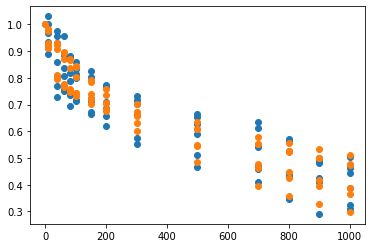

In [70]:
plt.plot(gtab.bvals, sim, 'o')
plt.plot(gtab.bvals, itf.predict(gtab), 'o')


In [18]:
debug

ERROR:root:No traceback has been produced, nothing to debug.


In [19]:
itf.perfusion_fraction, itf.perfusion_fit.md, itf.diffusion_fit.md

(0.1977531548927984, 0.03832508809832091, 0.0006746364020268355)

In [20]:
itf.perfusion_fit.evals, itf.diffusion_fit.evals

(array([0.09769849, 0.01228488, 0.00499189]),
 array([0.00100014, 0.0005175 , 0.00050627]))

In [21]:
import nibabel as nib

In [22]:
img = nib.load('./data/DWI_IVIM6.nii')

In [23]:
data = img.get_fdata()

In [24]:
idx = (48, 20)

In [25]:
signal = data[:, :, 10, :][idx]

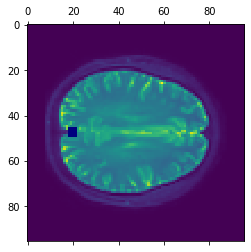

In [26]:
fig, ax = plt.subplots()
ax.matshow(data[:, :, 10, -1])
ROI = np.ones(data[:, :, 10, -1].shape) * np.nan
ROI[idx[0]-2:idx[0]+2, idx[1]-2:idx[1]+2] = 1
ax.matshow(ROI, cmap='jet')


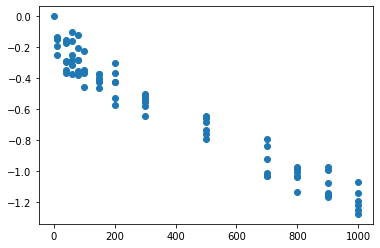

In [27]:
plt.plot(gtab.bvals, np.log(signal/signal[-1]), 'o')

In [28]:
itf = itm.fit(signal)

In [29]:
debug

ERROR:root:No traceback has been produced, nothing to debug.


In [30]:
itm.diffusion_fit.md, itm.perfusion_fit.md

(0.0010665451516001575, 0.0013624206285882282)

In [31]:
itf.diffusion_fit.md, itf.perfusion_fit.md

(0.0009661886299156767, 0.1303160245959176)

In [60]:
itf.perfusion_fraction

0.20161851773426906

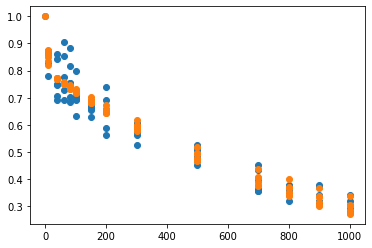

In [32]:
plt.plot(gtab.bvals, signal/signal[-1], 'o')
plt.plot(gtab.bvals, itf.predict(gtab), 'o')


In [33]:
itf.perfusion_fraction

0.20161851773426906

In [34]:
itf.perfusion_fit.fa

0.44233114469866464

In [35]:
itf.diffusion_fit.evals

array([0.00102502, 0.0010899 , 0.00078365])

In [36]:
itf.diffusion_fit.fa

0.16549571401313073

In [37]:
np.dot(itf.perfusion_fit.evecs[0], itf.perfusion_fit.evecs[1])

1.0208869162913393e-17

In [38]:
from dipy.reconst.ivim import IvimModel

In [39]:
mm = IvimModel(gtab)

/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:151: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)


In [40]:
ff = mm.fit(signal)

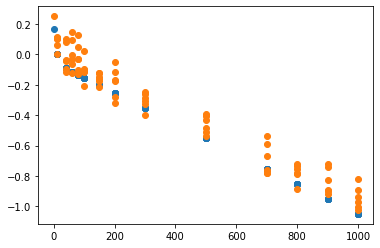

In [41]:
plt.plot(gtab.bvals, np.log(ff.predict(gtab)/ff.predict(gtab)[0]) , 'o')

plt.plot(gtab.bvals, np.log(signal/signal[0]), 'o')

In [42]:
ff.perfusion_fraction

array(0.19988648)

In [43]:
from dipy.core.geometry import sphere2cart, cart2sphere, euler_matrix

In [44]:
sphere2cart(1, np.pi, 0)

(array(1.2246468e-16), array(0.), array(-1.))

In [45]:
R = euler_matrix(0, 0, 0)

In [46]:
R[:3, :3] @ np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [47]:
from dipy.core.geometry import decompose_matrix, vec2vec_rotmat, rodrigues_axis_rotation

In [48]:
decompose_matrix(np.eye(4))

(array([1., 1., 1.]),
 [0.0, 0.0, 0.0],
 [0.0, -0.0, 0.0],
 array([0., 0., 0.]),
 array([0., 0., 0., 1.]))

In [49]:
vec2vec_rotmat(np.array([1, 0, 0]), np.array([0, 1, 0]))

array([[ 0., -1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [50]:
itm.diffusion_fit.evecs

array([[ 0.32866786,  0.50198695,  0.79999158],
       [ 0.88106381, -0.4680427 , -0.06828326],
       [-0.34015291, -0.72728614,  0.59611313]])

In [51]:
rot0 = np.eye(4)
rot0[:3, :3] = vec2vec_rotmat(itm.diffusion_fit.evecs[0], np.eye(3)[0])
scale, shear, angles0, translate, perspective = decompose_matrix(rot0)
em = euler_matrix(*angles0)

In [52]:
ang1 = np.arccos(np.dot(itm.diffusion_fit.evecs[1], em[1, :3]) / (np.linalg.norm(itm.diffusion_fit.evecs[1]) * np.linalg.norm(em[1, :3])))

In [53]:
rar = np.eye(4)

In [54]:
rar[:3, :3] = rodrigues_axis_rotation(itm.diffusion_fit.evecs[0], np.rad2deg(ang1))

In [55]:
em @ rar

array([[ 0.32866786,  0.50198695,  0.79999158,  0.        ],
       [ 0.88106381, -0.4680427 , -0.06828326,  0.        ],
       [ 0.34015291,  0.72728614, -0.59611313,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [56]:
itm.diffusion_fit.evecs

array([[ 0.32866786,  0.50198695,  0.79999158],
       [ 0.88106381, -0.4680427 , -0.06828326],
       [-0.34015291, -0.72728614,  0.59611313]])

In [57]:
scale, shear, angles, translate, perspective = decompose_matrix(em @ rar)

In [58]:
angles

[2.257398938482077, -0.3470795017234795, 1.213749283856508]

In [59]:
euler_matrix(*angles)[:3, :3]

array([[ 0.32866786,  0.50198695,  0.79999158],
       [ 0.88106381, -0.4680427 , -0.06828326],
       [ 0.34015291,  0.72728614, -0.59611313]])